# AoA Estimation 

### Linear Antenna Arrays

In this task, our goal is to estimate the AoA of the reflected signal from the RFID tag. Consider the linear antenna array setup shown below.

<img src="media/image2.png" alt="drawing" width="600"/>

 Assuming that the channels measured at antenna element `Rxi` is given by `h_i` , where `1 ≤ i ≤ N` , the AoA of the signal can be given by:  

<img src="media/image.png" alt="drawing" width="600"/>


However, since RFID tags reflect signals, the above formula needs to be modified in order to estimate the AoA. You should write down the modified formula in your report, and explain it.


Next, you must implement the function `estimate_aoa` to estimate the AoA given the channel measurements hi, based on the modified formula. The `estimate_aoa` function should return AoA values in the resolution of 1 degree. This function will be evaluated on two data sets, simulated data and real data from RFID hardware. 



In [97]:
import numpy as np

def estimate_aoa(h, d, wavelength):
    """
    Estima el ángulo de llegada (AoA) para un sistema monostático.

    Parámetros:
    h : array_like
        Arreglo de estimaciones de canal (en grados) para cada receptor.
    d : float
        Distancia entre receptores (en metros).
    wavelength : float
        Longitud de onda de la señal (en metros).

    Retorna:
    AoA : float
        Ángulo estimado de llegada (en grados).
    """
    # Convertir h a radianes
    h_rad = np.deg2rad(h)
    
    # Número de receptores
    N = len(h)
    
    # Rango de theta de 0 a pi
    theta_range = np.linspace(0, np.pi, 1000)
    
    # Inicializar arreglo para almacenar las magnitudes
    magnitudes = []
    
    # Constante para el cálculo
    k = (4 * np.pi * d) / wavelength * np.linspace(1, N, N)
    
    # Calcular la magnitud de la suma para cada theta
    for theta in theta_range:
        exponentials = np.exp(1j * h_rad - 1j * k * np.cos(theta))
        summation = np.sum(exponentials)
        magnitudes.append(np.abs(summation))
    
    # Encontrar el theta que maximiza la magnitud
    max_index = np.argmax(magnitudes)
    AoA_rad = theta_range[max_index]
    
    # Convertir el ángulo de radianes a grados
    AoA_deg = np.rad2deg(AoA_rad)
    
    return AoA_deg


Testing on simulated data 

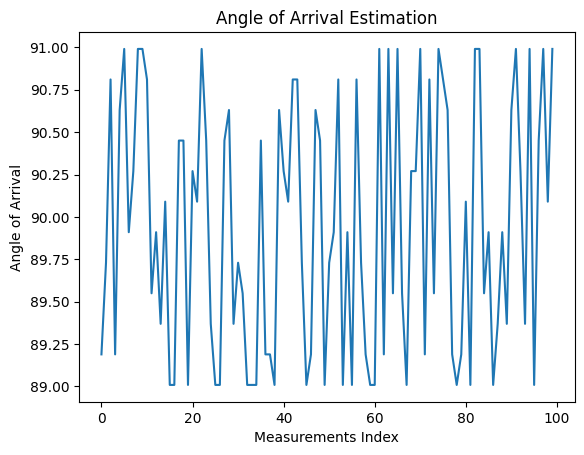

In [98]:
from utils import read_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import os

## Task 2 
## todo: Implement the function estimate_aoa(h, d, wavelength) that estimates the angle of arrival of the signal


# Load simulated data from .mat file
data = sio.loadmat('Test/Test_AoA_Estimation.mat')

# Assuming 'h_channel', 'd', and 'lambda' are keys in the loaded data
h_channel = data['h_channel']
d = data['d'][0][0]
lambda_ = data['lambda'][0][0]

# Initialize angles array
angles = np.zeros(100)

# Calculate angles using estimate_aoa function
for k in range(100):
    h_curr = h_channel[k, :]
    angles[k] = estimate_aoa(h_curr, d, lambda_)
    




# plot x axis is the angle and y is the  measurements index
plt.figure()
plt.plot(angles)
plt.xlabel('Measurements Index')
plt.ylabel('Angle of Arrival')
plt.title('Angle of Arrival Estimation')
plt.show()

# Save angles array to a .mat file
# sio.savemat('../Results/AoA_estimation.mat', {'angles': angles})

Testing on RFID data

In [96]:

# Read the real RFID data file
file = 'Lab_Data/lab3_task2.txt'
channel_log = read_data(file)

# Extract and process the data
ant = channel_log['ant'].values
freq = channel_log['Frequency'].iloc[0] * 1e3
pha = channel_log['Phase'].astype(float).values

phas = [None] * 4
h = np.zeros(4)

for k in range(4):
    phas[k] = pha[ant == (k + 1)]
    h[k] = np.mean(phas[k])

lambda_ = 3e8 / freq
d = lambda_ / 4


print(estimate_aoa(h, d, lambda_))



80.9009009009009


### Circular Antenna Arrays

In this subtask you will estimate the AoA from a circular array of RFIDs as shown below.

 <img src="media/image3.png" alt="drawing" width="600"/>

The circular array has n number of RFID tags and the radius of the array is R. The figure also shows the channels bk measured at antenna k for a signal arriving from θdirection. Based on
this, write down the formula similar to the equation provided above or calculating AoA for such a circular array. 

Assume the channels measured from RFID element i is given by hi . Note that your formula should account for the fact that RFID tags reflect signals, similar to the previous subpart. 

Now you must implement the function `estimate_aoa_circular` to estimate AoA given the channel measurements hi’s from a circular RFID array. 
The function also takes as input the radius of the array R and the λ. The `estimate_aoa_circular` function should return AoA values in the resolution of 1 degree. 

To evaluate your function, you must run the test script below which will save the output in the Results folder.

In [2]:
def estimate_aoa_circular(h, R, wavelength):
    aoa = 0
    return aoa


In [3]:
import numpy as np
import scipy.io as sio

# Load data from .mat file
data = sio.loadmat('Test/Test_AoA_Estimation_circular.mat')

# Assuming 'channels', 'R', and 'lambda' are keys in the loaded data
channels = data['channels']
R = data['R'][0][0]
lambda_ = data['lambda'][0][0]

# Initialize angles array
angles = np.zeros(100)

# Calculate angles using estimate_aoa_circular function
for k in range(100):
    h_curr = channels[k, :]
    angles[k] = estimate_aoa_circular(h_curr, R, lambda_)

# Save angles array to a .mat file
sio.savemat('Results/AoA_estimation_circular.mat', {'angles': angles})
